In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import os

#warnings
import warnings
warnings.filterwarnings("ignore")

**Loading and visualizing the data**

In [2]:
data_dictionary = pd.read_csv('../L&T Vehicle Loan Default Prediction/Dataset/data_dictionary.csv')
data_dictionary[['Variable Name', 'Description', 'Unnamed: 2']]

,Variable Name,Description,Unnamed: 2
0,UniqueID,Identifier for customers,NaN
1,loan_default,Payment default in the first EMI on due date,NaN
2,disbursed_amount,Amount of Loan disbursed,NaN
3,asset_cost,Cost of the Asset,NaN
4,ltv,Loan to Value of the asset,NaN
5,branch_id,Branch where the loan was disbursed,NaN
6,supplier_id,Vehicle Dealer where the loan was disbursed,NaN
7,manufacturer_id,"Vehicle manufacturer(Hero, Honda, TVS etc.)",NaN
8,Current_pincode,Current pincode of the customer,NaN
9,Date.of.Birth,Date of birth of the customer,NaN


In [3]:
train = pd.read_csv('../L&T Vehicle Loan Default Prediction/Dataset/train.csv')
train.head()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,Date.of.Birth,Employment.Type,...,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,AVERAGE.ACCT.AGE,CREDIT.HISTORY.LENGTH,NO.OF_INQUIRIES,loan_default
0,420825,50578,58400,89.55,67,22807,45,1441,01-01-84,Salaried,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
1,537409,47145,65550,73.23,67,22807,45,1502,31-07-85,Self employed,...,0,0,1991,0,0,1,1yrs 11mon,1yrs 11mon,0,1
2,417566,53278,61360,89.63,67,22807,45,1497,24-08-85,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,0,0
3,624493,57513,66113,88.48,67,22807,45,1501,30-12-93,Self employed,...,0,0,31,0,0,0,0yrs 8mon,1yrs 3mon,1,1
4,539055,52378,60300,88.39,67,22807,45,1495,09-12-77,Self employed,...,0,0,0,0,0,0,0yrs 0mon,0yrs 0mon,1,1


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   UniqueID                             233154 non-null  int64  
 1   disbursed_amount                     233154 non-null  int64  
 2   asset_cost                           233154 non-null  int64  
 3   ltv                                  233154 non-null  float64
 4   branch_id                            233154 non-null  int64  
 5   supplier_id                          233154 non-null  int64  
 6   manufacturer_id                      233154 non-null  int64  
 7   Current_pincode_ID                   233154 non-null  int64  
 8   Date.of.Birth                        233154 non-null  object 
 9   Employment.Type                      225493 non-null  object 
 10  DisbursalDate                        233154 non-null  object 
 11  State_ID     

In [5]:
train.describe()

,UniqueID,disbursed_amount,asset_cost,ltv,branch_id,supplier_id,manufacturer_id,Current_pincode_ID,State_ID,Employee_code_ID,...,SEC.OVERDUE.ACCTS,SEC.CURRENT.BALANCE,SEC.SANCTIONED.AMOUNT,SEC.DISBURSED.AMOUNT,PRIMARY.INSTAL.AMT,SEC.INSTAL.AMT,NEW.ACCTS.IN.LAST.SIX.MONTHS,DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS,NO.OF_INQUIRIES,loan_default
count,233154.000000,233154.000000,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,233154.000000,...,233154.000000,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,2.331540e+05,233154.000000,233154.000000,233154.000000,233154.000000
mean,535917.573376,54356.993528,7.586507e+04,74.746530,72.936094,19638.635035,69.028054,3396.880247,7.262243,1549.477148,...,0.007244,5.427793e+03,7.295923e+03,7.179998e+03,1.310548e+04,3.232684e+02,0.381833,0.097481,0.206615,0.217071
std,68315.693711,12971.314171,1.894478e+04,11.456636,69.834995,3491.949566,22.141304,2238.147502,4.482230,975.261278,...,0.111079,1.702370e+05,1.831560e+05,1.825925e+05,1.513679e+05,1.555369e+04,0.955107,0.384439,0.706498,0.412252
min,417428.000000,13320.000000,3.700000e+04,10.030000,1.000000,10524.000000,45.000000,1.000000,1.000000,1.000000,...,0.000000,-5.746470e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,476786.250000,47145.000000,6.571700e+04,68.880000,14.000000,16535.000000,48.000000,1511.000000,4.000000,713.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,535978.500000,53803.000000,7.094600e+04,76.800000,61.000000,20333.000000,86.000000,2970.000000,6.000000,1451.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,595039.750000,60413.000000,7.920175e+04,83.670000,130.000000,23000.000000,86.000000,5677.000000,10.000000,2362.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,1.999000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000
max,671084.000000,990572.000000,1.628992e+06,95.000000,261.000000,24803.000000,156.000000,7345.000000,22.000000,3795.000000,...,8.000000,3.603285e+07,3.000000e+07,3.000000e+07,2.564281e+07,4.170901e+06,35.000000,20.000000,36.000000,1.000000


**Data Preprocessing**

In [6]:
train.isnull().sum()

UniqueID                                  0
disbursed_amount                          0
asset_cost                                0
ltv                                       0
branch_id                                 0
supplier_id                               0
manufacturer_id                           0
Current_pincode_ID                        0
Date.of.Birth                             0
Employment.Type                        7661
DisbursalDate                             0
State_ID                                  0
Employee_code_ID                          0
MobileNo_Avl_Flag                         0
Aadhar_flag                               0
PAN_flag                                  0
VoterID_flag                              0
Driving_flag                              0
Passport_flag                             0
PERFORM_CNS.SCORE                         0
PERFORM_CNS.SCORE.DESCRIPTION             0
PRI.NO.OF.ACCTS                           0
PRI.ACTIVE.ACCTS                

In [7]:
train['Employment.Type'].value_counts()

Employment.Type
Self employed    127635
Salaried          97858
Name: count, dtype: int64

In [8]:
train['Employment.Type'] = train['Employment.Type'].fillna('Missing')
train['Employment.Type'].value_counts()

Employment.Type
Self employed    127635
Salaried          97858
Missing            7661
Name: count, dtype: int64

In [9]:
train.columns

Index(['UniqueID', 'disbursed_amount', 'asset_cost', 'ltv', 'branch_id',
       'supplier_id', 'manufacturer_id', 'Current_pincode_ID', 'Date.of.Birth',
       'Employment.Type', 'DisbursalDate', 'State_ID', 'Employee_code_ID',
       'MobileNo_Avl_Flag', 'Aadhar_flag', 'PAN_flag', 'VoterID_flag',
       'Driving_flag', 'Passport_flag', 'PERFORM_CNS.SCORE',
       'PERFORM_CNS.SCORE.DESCRIPTION', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES',
       'loan_default'],
      dtype='object')

In [10]:
# Converting features to categorical columns
for col in ['UniqueID','Aadhar_flag', 'branch_id', 'Current_pincode_ID', 'Driving_flag',
            'Employee_code_ID', 'loan_default', 'manufacturer_id' , 
            'MobileNo_Avl_Flag', 'State_ID', 'State_ID', 'VoterID_flag',
            'PAN_flag', 'Passport_flag', 'PERFORM_CNS.SCORE.DESCRIPTION',
            'Employment.Type']:
    train[col] = train[col].astype('category')
    
# Convert the date time variables
train['Date.of.Birth'] = pd.to_datetime(train['Date.of.Birth'])
train['DisbursalDate'] = pd.to_datetime(train['DisbursalDate'])

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233154 entries, 0 to 233153
Data columns (total 41 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   UniqueID                             233154 non-null  category      
 1   disbursed_amount                     233154 non-null  int64         
 2   asset_cost                           233154 non-null  int64         
 3   ltv                                  233154 non-null  float64       
 4   branch_id                            233154 non-null  category      
 5   supplier_id                          233154 non-null  int64         
 6   manufacturer_id                      233154 non-null  category      
 7   Current_pincode_ID                   233154 non-null  category      
 8   Date.of.Birth                        233154 non-null  datetime64[ns]
 9   Employment.Type                      233154 non-null  category      
 

Analyzing the Categorical Variable

In [12]:
train.describe(include=['category'])

,UniqueID,branch_id,manufacturer_id,Current_pincode_ID,Employment.Type,State_ID,Employee_code_ID,MobileNo_Avl_Flag,Aadhar_flag,PAN_flag,VoterID_flag,Driving_flag,Passport_flag,PERFORM_CNS.SCORE.DESCRIPTION,loan_default
count,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154,233154
unique,233154,82,11,6698,3,22,3270,1,2,2,2,2,2,20,2
top,417428,2,86,2578,Self employed,4,2546,1,1,0,0,0,0,No Bureau History Available,0
freq,1,13138,109534,1880,127635,44870,628,233154,195924,215533,199360,227735,232658,116950,182543


In [13]:
train.select_dtypes(include=['category']).nunique()

UniqueID                         233154
branch_id                            82
manufacturer_id                      11
Current_pincode_ID                 6698
Employment.Type                       3
State_ID                             22
Employee_code_ID                   3270
MobileNo_Avl_Flag                     1
Aadhar_flag                           2
PAN_flag                              2
VoterID_flag                          2
Driving_flag                          2
Passport_flag                         2
PERFORM_CNS.SCORE.DESCRIPTION        20
loan_default                          2
dtype: int64

In [14]:
train['DisbursalDate'].head()

0   2018-03-08
1   2018-09-26
2   2018-01-08
3   2018-10-26
4   2018-09-26
Name: DisbursalDate, dtype: datetime64[ns]

Creating the age column of customers

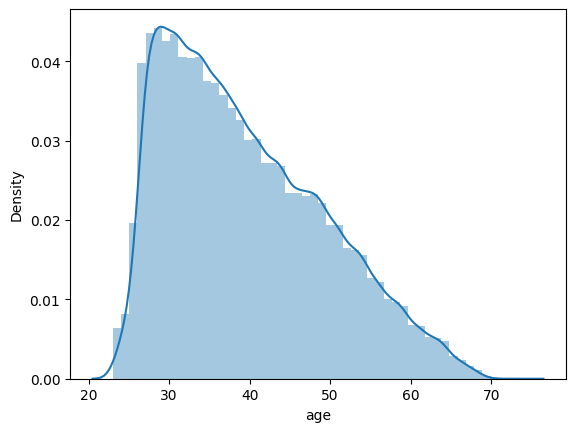

In [15]:
now = np.datetime64('now')

# Convert 'Date.of.Birth' column to datetime if it's not already
train['Date.of.Birth'] = pd.to_datetime(train['Date.of.Birth'])

# Adjusting the date of birth where it's greater than 'now', subtracting 100 years if necessary
train['Date.of.Birth'] = train['Date.of.Birth'].where(train['Date.of.Birth'] < now, train['Date.of.Birth'] - np.timedelta64(100*365, 'D'))

# Calculating age based on the adjusted date of birth
train['age'] = (now - train['Date.of.Birth']).dt.days // 365

sns.distplot(train['age'])
plt.show()

In [16]:
train['DisbursalDate']

0        2018-03-08
1        2018-09-26
2        2018-01-08
3        2018-10-26
4        2018-09-26
            ...    
233149   2018-10-26
233150   2018-10-23
233151   2018-10-24
233152   2018-09-29
233153   2018-10-27
Name: DisbursalDate, Length: 233154, dtype: datetime64[ns]

<Axes: xlabel='AgeatDisbursal', ylabel='Density'>

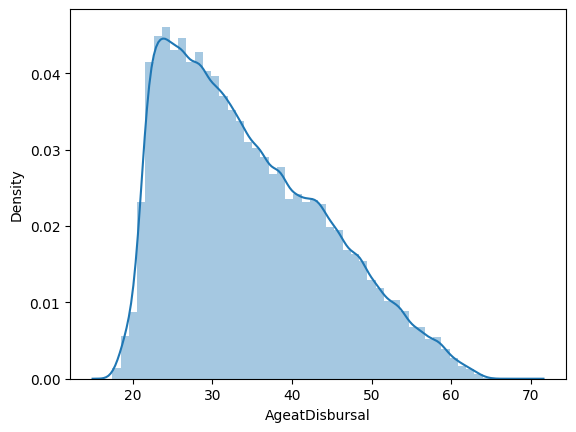

In [17]:
# Calculate the age at disbursal
train['AgeatDisbursal'] = ((train['DisbursalDate'] - train['Date.of.Birth']).dt.days) / 365

sns.distplot(train['AgeatDisbursal'])

Converting Credit History Length and Average Acct Age into months

In [18]:
def month_conversion(month):
    if isinstance(month, int):
        return month
    year = int(month.split()[0].replace('yrs',''))
    months = int(month.split()[1].replace('mon',''))
    return year * 12 + months

In [19]:
train['AVERAGE.ACCT.AGE'].head()

0     0yrs 0mon
1    1yrs 11mon
2     0yrs 0mon
3     0yrs 8mon
4     0yrs 0mon
Name: AVERAGE.ACCT.AGE, dtype: object

In [20]:
# Apply the month_conversion function to the 'AVERAGE.ACCT.AGE' and 'CREDIT.HISTORY.LENGTH' columns
train['AVERAGE.ACCT.AGE'] = train['AVERAGE.ACCT.AGE'].apply(month_conversion)
train['CREDIT.HISTORY.LENGTH'] = train['CREDIT.HISTORY.LENGTH'].apply(month_conversion)

# Display the first few rows of the 'CREDIT.HISTORY.LENGTH' and 'AVERAGE.ACCT.AGE' columns
train[['CREDIT.HISTORY.LENGTH', 'AVERAGE.ACCT.AGE']].head()


,CREDIT.HISTORY.LENGTH,AVERAGE.ACCT.AGE
0,0,0
1,23,23
2,0,0
3,15,8
4,0,0


**EDA**

Target Column - Loan Default

In [21]:
train['loan_default'].value_counts()

loan_default
0    182543
1     50611
Name: count, dtype: int64

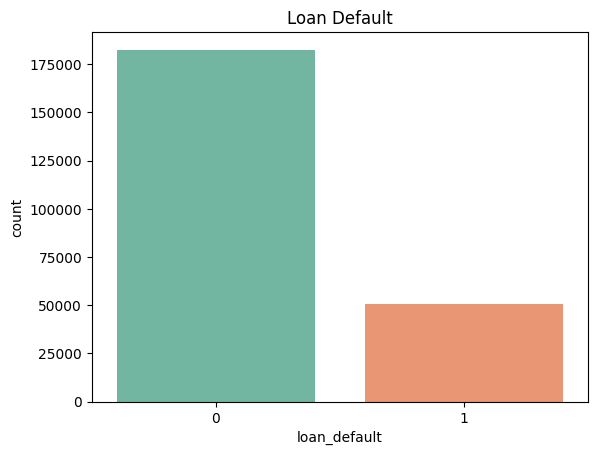

In [22]:
if not os.path.exists("pictures"):
    os.makedirs("pictures")

sns.countplot(x='loan_default', data=train, palette="Set2")
plt.title("Loan Default")
plt.savefig("pictures/loan_default.png", bbox_inches="tight")
plt.show()

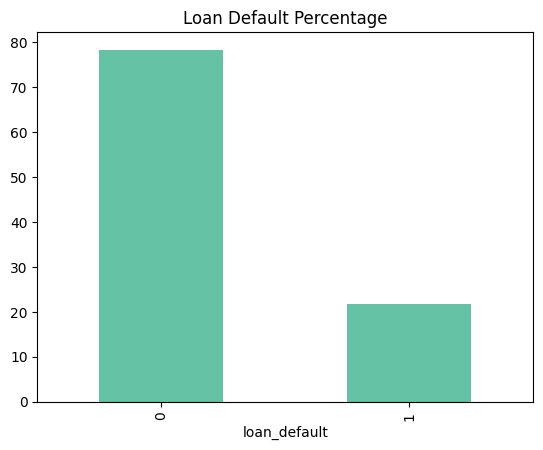

In [23]:
train['loan_default'].value_counts(normalize=True) * 100

sns.set_palette("Set2")

(train['loan_default'].value_counts(normalize=True) * 100).plot(kind='bar')
plt.title("Loan Default Percentage")
plt.savefig("pictures/loan_default_percentage.png", bbox_inches="tight")
plt.show()

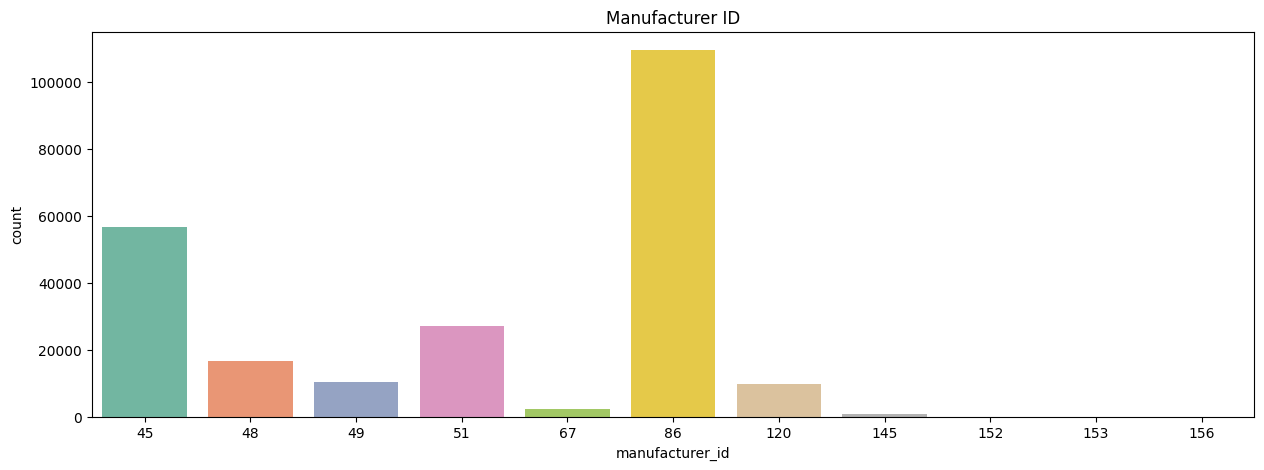

In [24]:
colors = sns.color_palette("Set2", len(train['manufacturer_id'].unique()))

plt.figure(figsize=(15, 5))
sns.countplot(x='manufacturer_id', data=train, palette=colors)
plt.title("Manufacturer ID")
plt.savefig("pictures/manufacturer_id_loan_default.png", bbox_inches="tight")
plt.show()

Manufacturer_id 86 has given the most number of vehicles

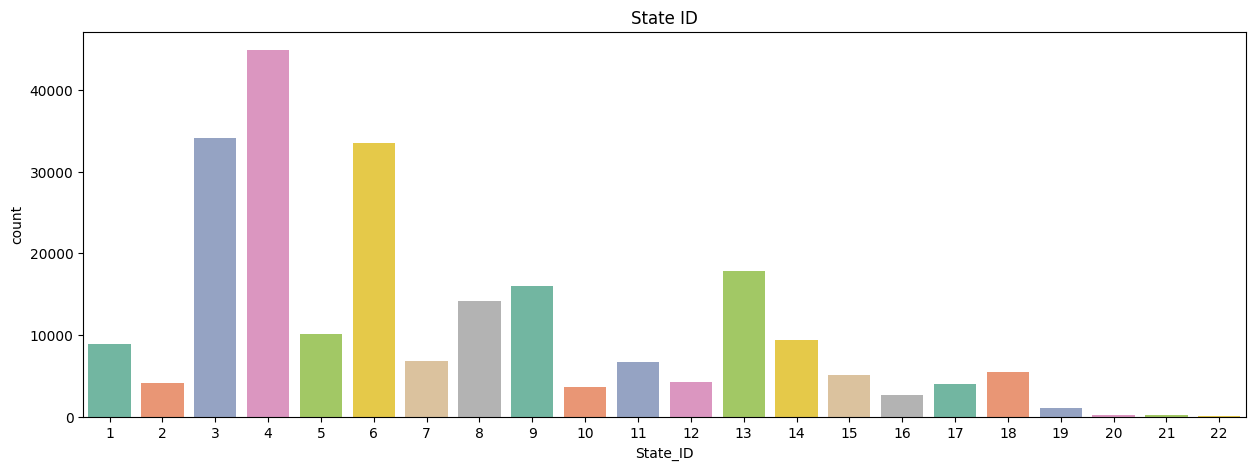

In [25]:
# State of disbursement
colors = sns.color_palette("Set2", len(train['State_ID'].unique()))
plt.figure(figsize=(15, 5))
sns.countplot(x='State_ID', data=train, palette=colors)
plt.title("State ID")
plt.savefig("pictures/state_id_loan_default.png", bbox_inches="tight")
plt.show()

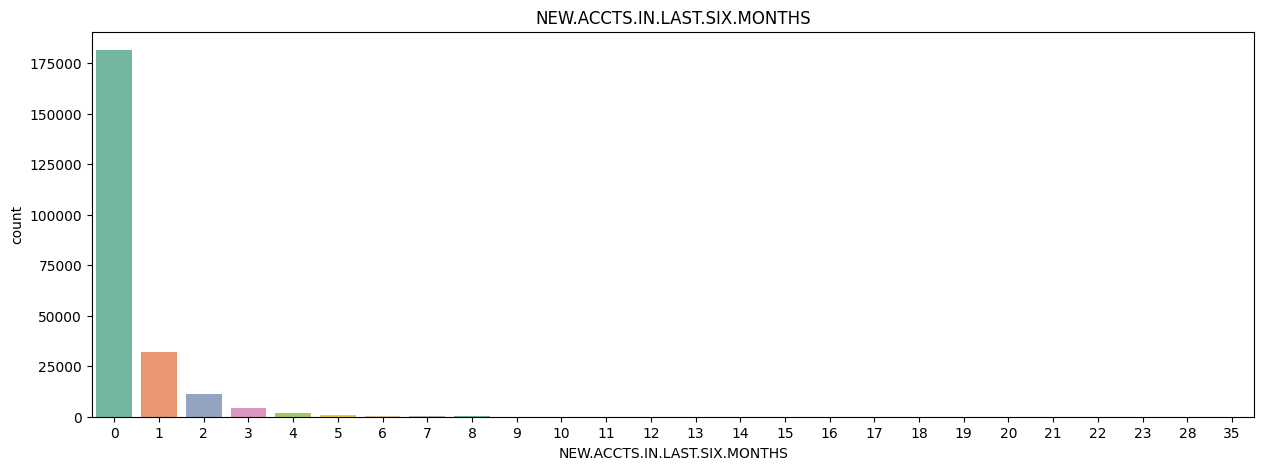

In [26]:
colors = sns.color_palette("Set2", len(train['NEW.ACCTS.IN.LAST.SIX.MONTHS'].unique()))
plt.figure(figsize=(15, 5))
sns.countplot(x='NEW.ACCTS.IN.LAST.SIX.MONTHS', data=train, palette=colors)
plt.title("NEW.ACCTS.IN.LAST.SIX.MONTHS")

plt.savefig("pictures/new_accts_in_last_six_months.png", bbox_inches="tight")
plt.show()

In [27]:
train['NEW.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize=100).head()

NEW.ACCTS.IN.LAST.SIX.MONTHS
0    0.778430
1    0.137673
2    0.047243
3    0.019120
4    0.008394
Name: proportion, dtype: float64

It can be infered around 77% of the customers have zero new loans taken by the them in last 6 months before the disbursment

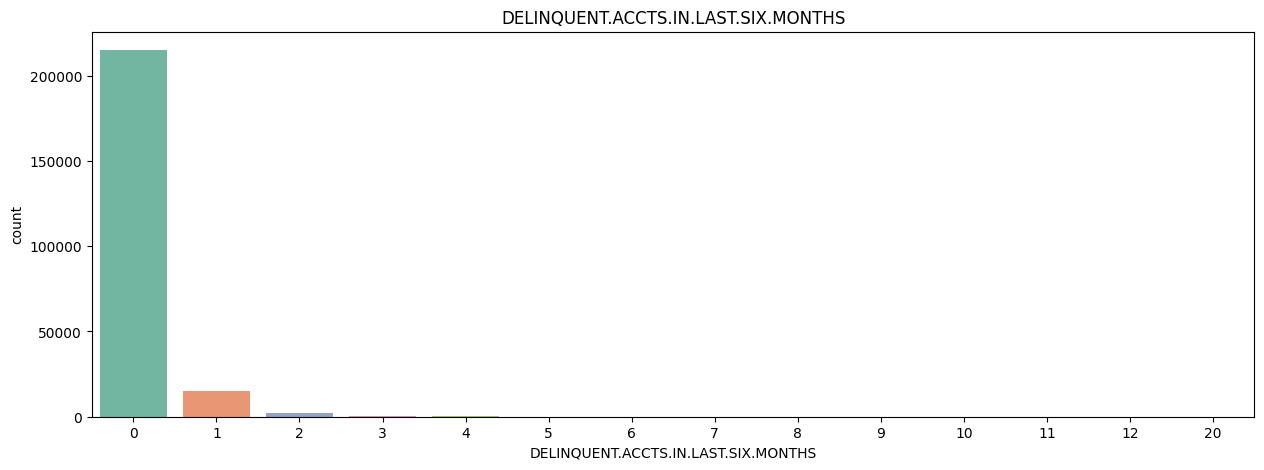

In [28]:
colors = sns.color_palette("Set2", len(train['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].unique()))

plt.figure(figsize=(15, 5))
sns.countplot(x='DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS', data=train, palette=colors)
plt.title("DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS")

plt.savefig("pictures/delinquent_accts_in_last_six_months.png", bbox_inches="tight")
plt.show()

In [29]:
train['DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS'].value_counts(normalize=100).head()

DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS
0    0.921961
1    0.064082
2    0.010594
3    0.002303
4    0.000592
Name: proportion, dtype: float64

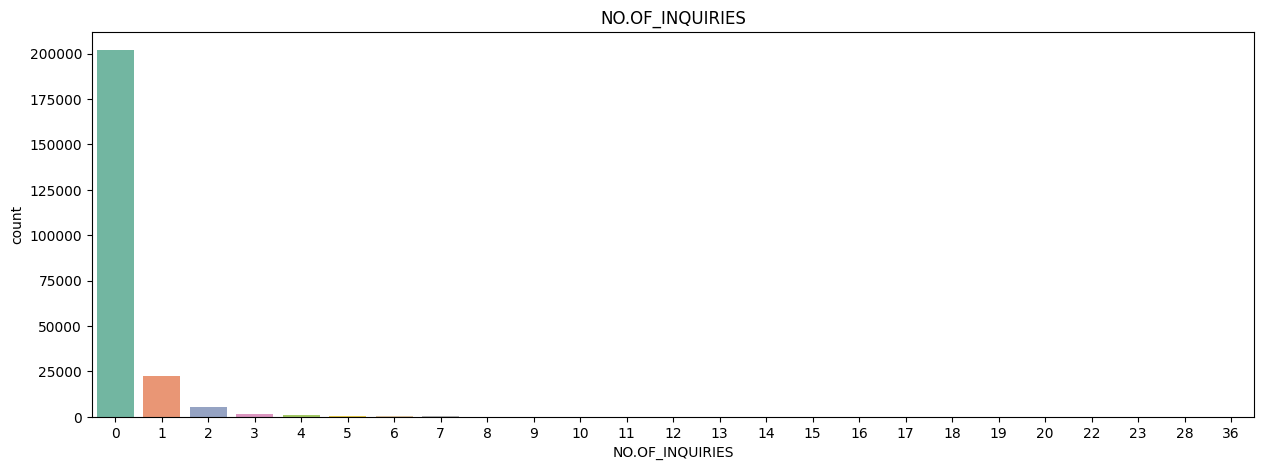

In [30]:
colors = sns.color_palette("Set2", len(train['NO.OF_INQUIRIES'].unique()))

plt.figure(figsize=(15, 5))
sns.countplot(x='NO.OF_INQUIRIES', data=train, palette=colors)
plt.title("NO.OF_INQUIRIES")
plt.savefig("pictures/no_of_inquiries.png", bbox_inches="tight")
plt.show()

In [31]:
train['NO.OF_INQUIRIES'].value_counts(normalize=100).head()

NO.OF_INQUIRIES
0    0.866213
1    0.095581
2    0.023199
3    0.007579
4    0.003260
Name: proportion, dtype: float64

Around 86% of the customers have not made any enquiries before taking the loans

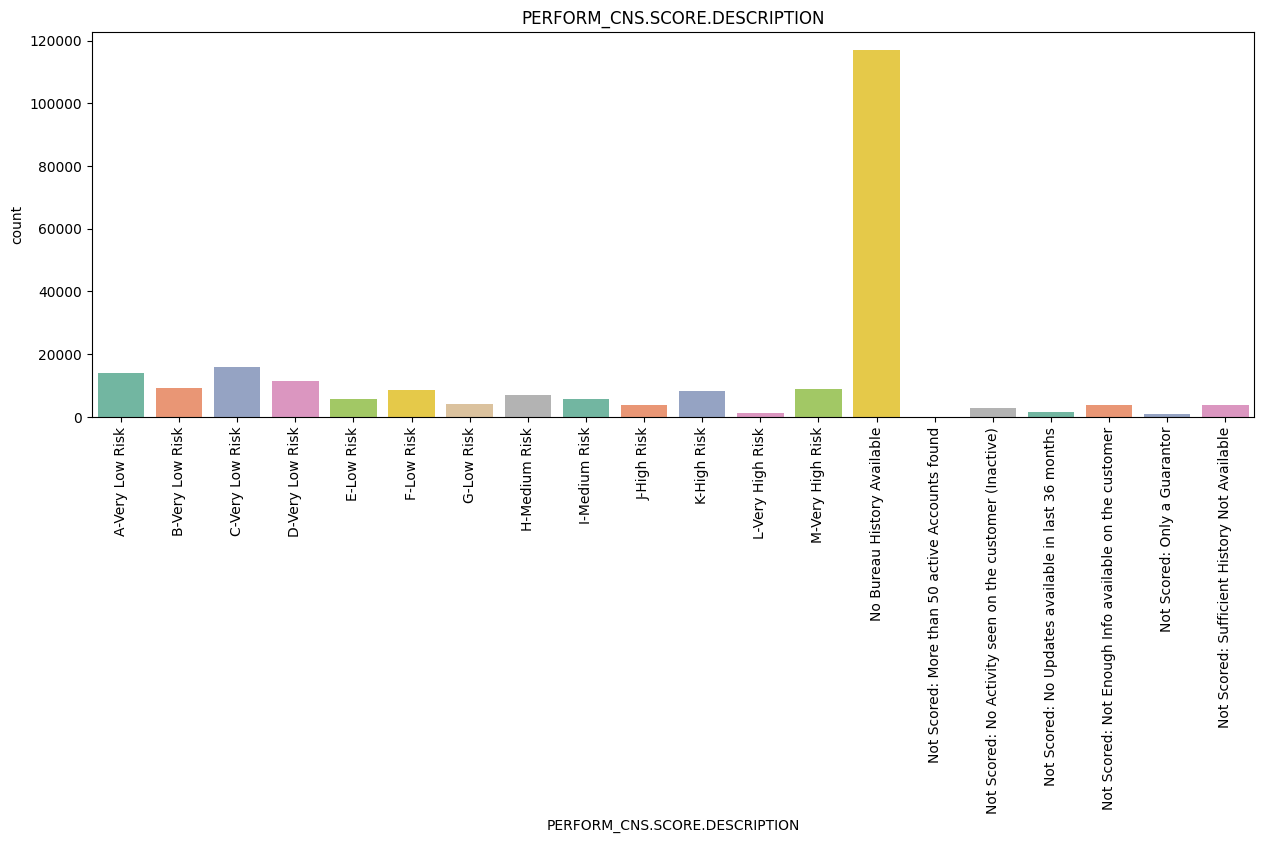

In [32]:
colors = sns.color_palette("Set2", len(train['PERFORM_CNS.SCORE.DESCRIPTION'].unique()))

plt.figure(figsize=(15, 5))
sns.countplot(x='PERFORM_CNS.SCORE.DESCRIPTION', data=train, palette=colors)
plt.title("PERFORM_CNS.SCORE.DESCRIPTION")
plt.xticks(rotation=90)  

plt.savefig("pictures/perform_cns_score_description.png", bbox_inches="tight")
plt.show()

In [33]:
train['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts(normalize=100)

PERFORM_CNS.SCORE.DESCRIPTION
No Bureau History Available                                0.501600
C-Very Low Risk                                            0.068817
A-Very Low Risk                                            0.060578
D-Very Low Risk                                            0.048715
B-Very Low Risk                                            0.039463
M-Very High Risk                                           0.037640
F-Low Risk                                                 0.036392
K-High Risk                                                0.035500
H-Medium Risk                                              0.029401
E-Low Risk                                                 0.024966
I-Medium Risk                                              0.023834
G-Low Risk                                                 0.017105
Not Scored: Sufficient History Not Available               0.016148
J-High Risk                                                0.016075
Not Scored: Not En

More than 50% data has no bureau history available.

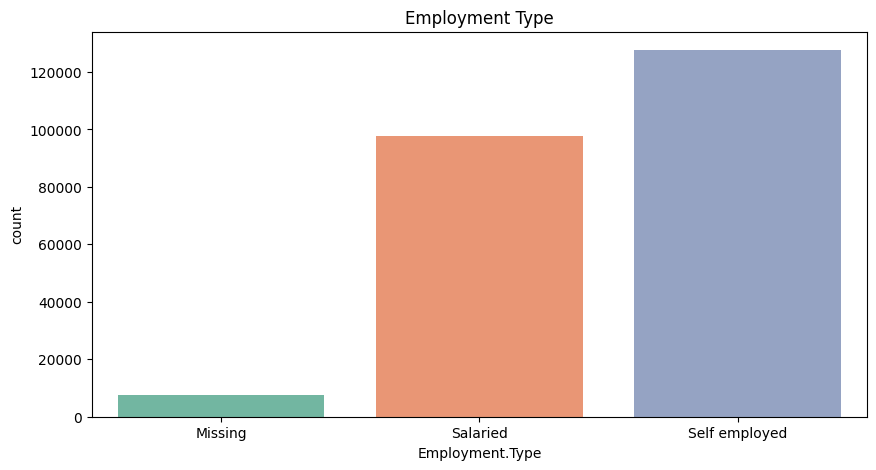

In [34]:
colors = sns.color_palette("Set2", len(train['Employment.Type'].unique()))

plt.figure(figsize=(10, 5))
sns.countplot(x='Employment.Type', data=train, palette=colors)
plt.title("Employment Type")
plt.savefig("pictures/employment_type.png", bbox_inches="tight")
plt.show()

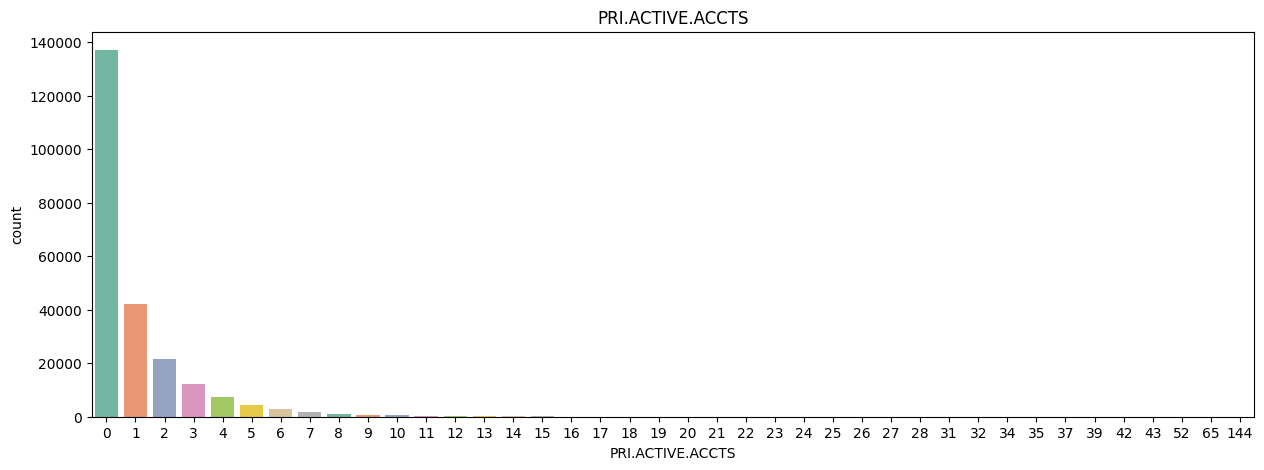

In [35]:
colors = sns.color_palette("Set2", len(train['PRI.ACTIVE.ACCTS'].unique()))

plt.figure(figsize=(15, 5))
sns.countplot(x='PRI.ACTIVE.ACCTS', data=train, palette=colors)
plt.title("PRI.ACTIVE.ACCTS")
plt.savefig("pictures/pri_active_accts.png", bbox_inches="tight")
plt.show()

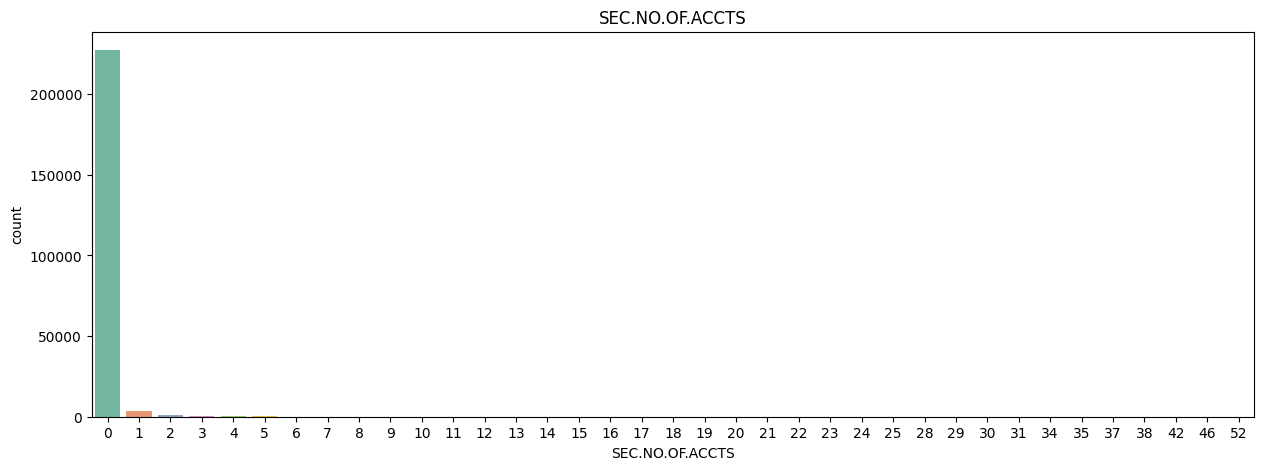

In [36]:
colors = sns.color_palette("Set2", len(train['SEC.NO.OF.ACCTS'].unique()))

plt.figure(figsize=(15, 5))
sns.countplot(x='SEC.NO.OF.ACCTS', data=train, palette=colors)
plt.title("SEC.NO.OF.ACCTS")
plt.savefig("pictures/sec_no_of_accts.png", bbox_inches="tight")
plt.show()

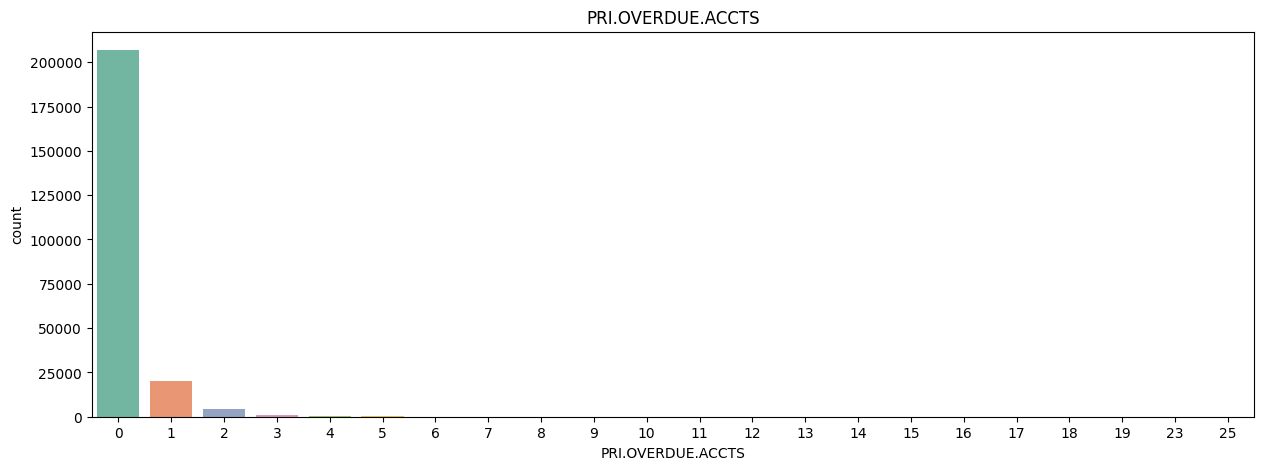

In [37]:
plt.figure(figsize=(15, 5))
sns.countplot(x='PRI.OVERDUE.ACCTS', data=train, palette="Set2")
plt.title("PRI.OVERDUE.ACCTS")
plt.savefig("pictures/pri_overdue_accts.png", bbox_inches="tight")
plt.show()

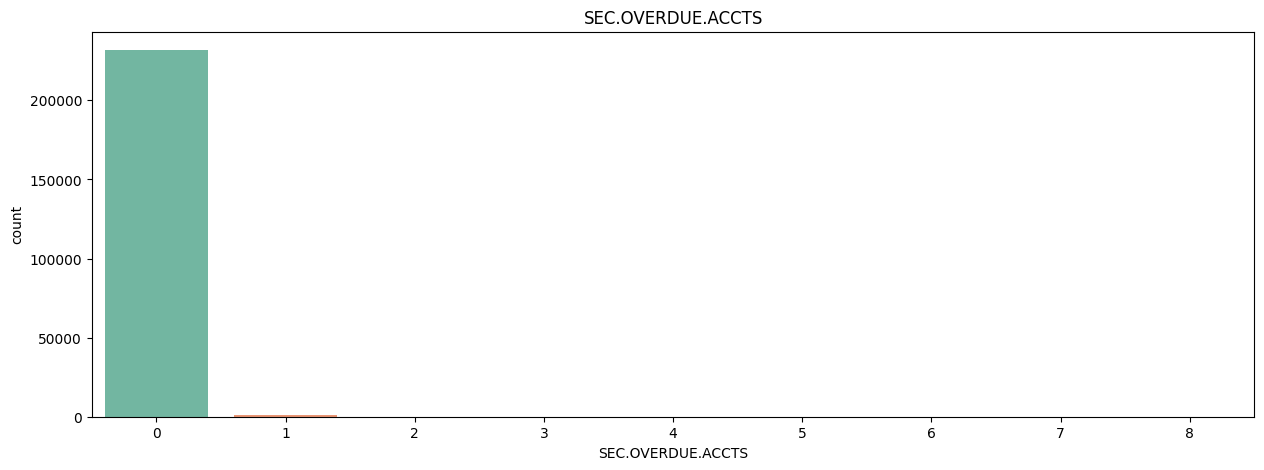

In [38]:
plt.figure(figsize=(15, 5))
sns.countplot(x='SEC.OVERDUE.ACCTS', data=train, palette="Set2")
plt.title("SEC.OVERDUE.ACCTS")
plt.savefig("pictures/sec_overdue_accts.png", bbox_inches="tight")
plt.show()

Most of the customers have zero primary and secondary overdue accounts

In [39]:
train = train.replace({'PERFORM_CNS.SCORE.DESCRIPTION':{'C-Very Low Risk':'Low', 'A-Very Low Risk':'Low',
                                                       'B-Very Low Risk':'Low', 'D-Very Low Risk':'Low',
                                                       'F-Low Risk':'Low', 'E-Low Risk':'Low', 'G-Low Risk':'Low',
                                                       'H-Medium Risk': 'Medium', 'I-Medium Risk': 'Medium',
                                                       'J-High Risk':'High', 'K-High Risk':'High','L-Very High Risk':'Very High',
                                                       'M-Very High Risk':'Very High','Not Scored: More than 50 active Accounts found':'Not Scored',
                                                       'Not Scored: Only a Guarantor':'Not Scored','Not Scored: Not Enough Info available on the customer':'Not Scored',
                                                        'Not Scored: No Activity seen on the customer (Inactive)':'Not Scored','Not Scored: No Updates available in last 36 months':'Not Scored',
                                                       'Not Scored: Sufficient History Not Available':'Not Scored', 'No Bureau History Available':'Not Scored'
                                                       }})

train['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts()

PERFORM_CNS.SCORE.DESCRIPTION
Not Scored    129785
Low            69022
Medium         12412
High           12025
Very High       9910
Name: count, dtype: int64

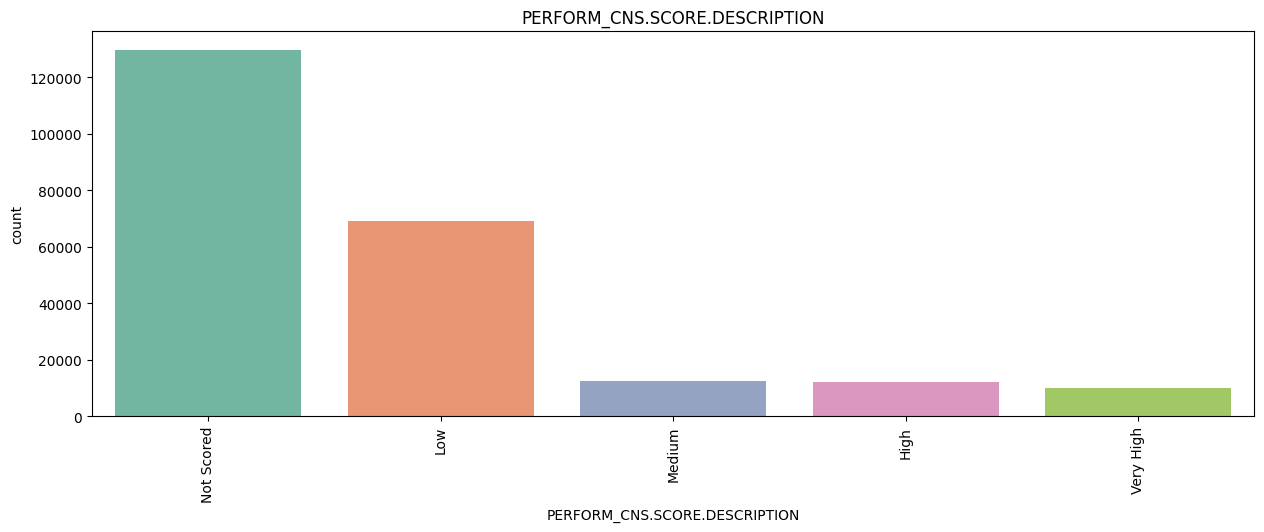

In [40]:
score_order = train['PERFORM_CNS.SCORE.DESCRIPTION'].value_counts().index

plt.figure(figsize=(15, 5))
sns.countplot(x='PERFORM_CNS.SCORE.DESCRIPTION', data=train, order=score_order, palette="Set2")
plt.title("PERFORM_CNS.SCORE.DESCRIPTION")
plt.xticks(rotation=90)
plt.savefig("pictures/perform_cns_score_description.png", bbox_inches="tight")
plt.show()

Numerical Features: disbursed_amount, asset_cost, ltv

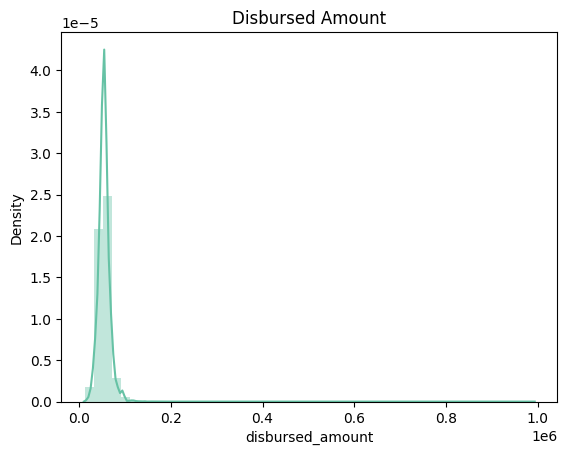

In [41]:
# disbursed_amount = Amount of Loan disbursed
sns.distplot(train['disbursed_amount'])
plt.title("Disbursed Amount")
plt.savefig("pictures/dist_disbursed_amount.png", bbox_inches="tight")
plt.show()

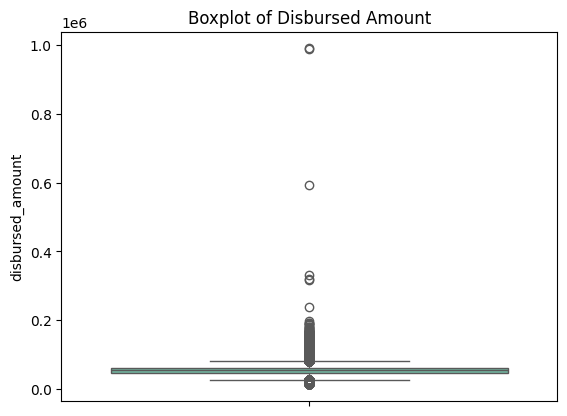

In [42]:
sns.boxplot(train['disbursed_amount'])
plt.title("Boxplot of Disbursed Amount")
plt.savefig("pictures/boxpl_disbursed_amount.png", bbox_inches="tight")
plt.show()

It is heavily right skewed data

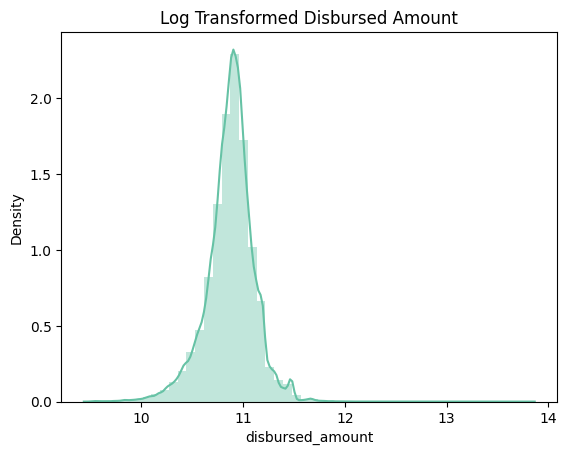

In [43]:
sns.distplot(np.log(train['disbursed_amount']))
plt.title("Log Transformed Disbursed Amount")
plt.savefig("pictures/log_tras_disbursed_amount.png", bbox_inches="tight")
plt.show()

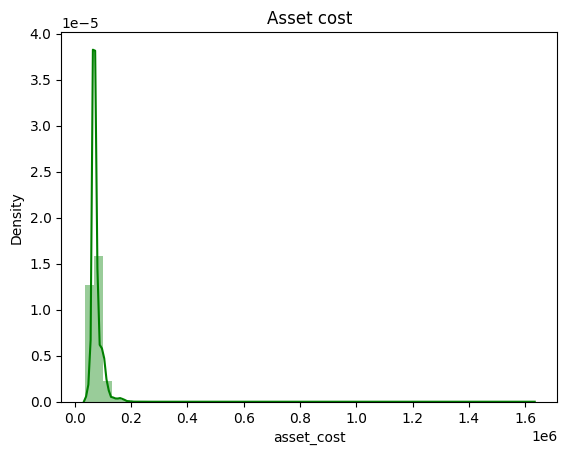

In [44]:
# asset_cost = Cost of the Asset
sns.distplot(train['asset_cost'],color='g')
plt.title("Asset cost")
plt.savefig("pictures/dist_asset_cost.png", bbox_inches="tight")
plt.show()

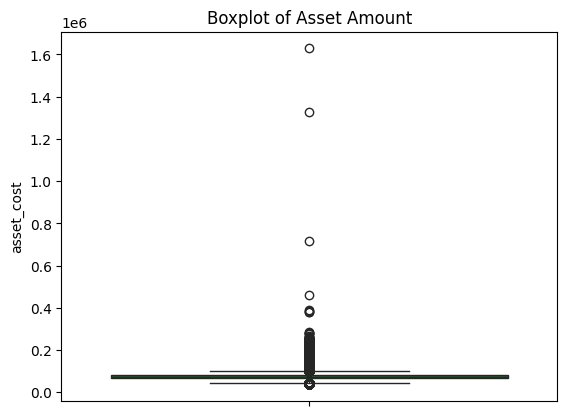

In [45]:
sns.boxplot(train['asset_cost'],color='g')
plt.title("Boxplot of Asset Amount")
plt.savefig("pictures/boxpl_asset_cost.png", bbox_inches="tight")
plt.show()

It is heavily right skewed data

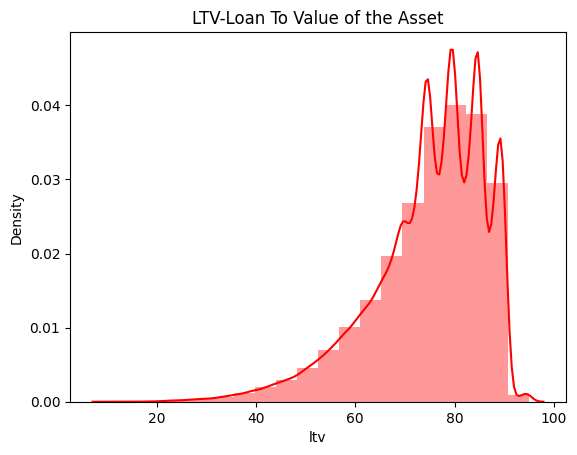

In [46]:
# ltv = Loan to Value of the asset
sns.distplot(train['ltv'],bins=20,color='r')
plt.title("LTV-Loan To Value of the Asset")
plt.savefig("pictures/dist_ltv.png", bbox_inches="tight")
plt.show()

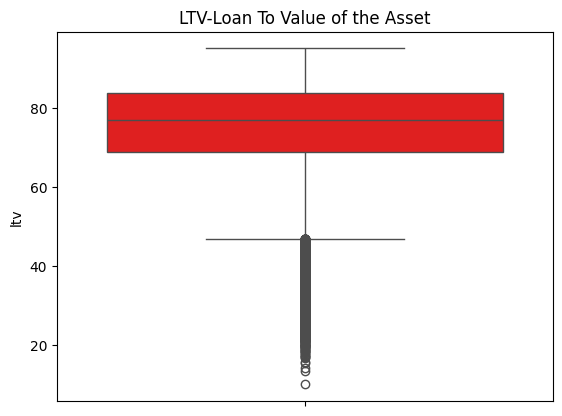

In [47]:
sns.boxplot(train['ltv'],color='r')
plt.title("LTV-Loan To Value of the Asset")
plt.savefig("pictures/boxpl_ltv.png", bbox_inches="tight")
plt.show()

It is heavily left skewed

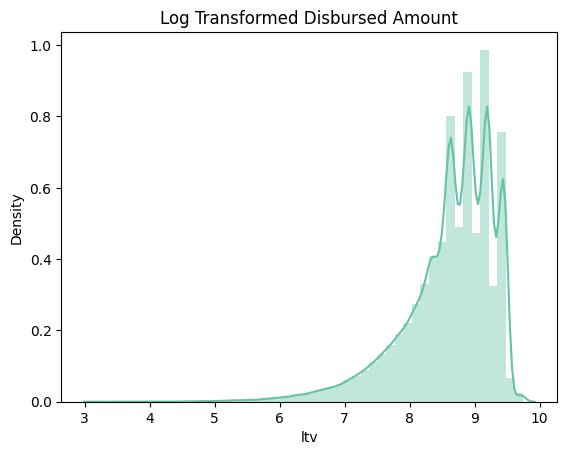

In [48]:
sns.distplot(np.sqrt(train['ltv']))
plt.title("Log Transformed Disbursed Amount")
plt.savefig("pictures/log_trans_ltv.png", bbox_inches="tight")
plt.show()

A disbursement, also called a cash disbursement or cash payment, refers to a wide range of payment types made in a specific period, including interest payments on loans and operating expenses. Disbursement can also refer to a loan payment, such as a student loan.

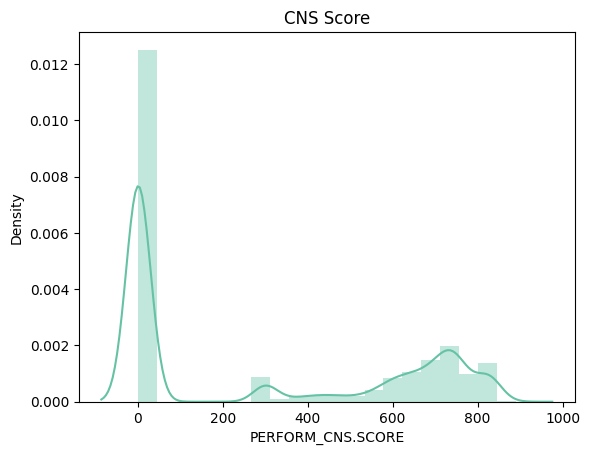

In [49]:
sns.distplot(train['PERFORM_CNS.SCORE'],bins=20)
plt.title("CNS Score")
plt.savefig("pictures/dist_perform_cns_score.png", bbox_inches="tight")
plt.show()

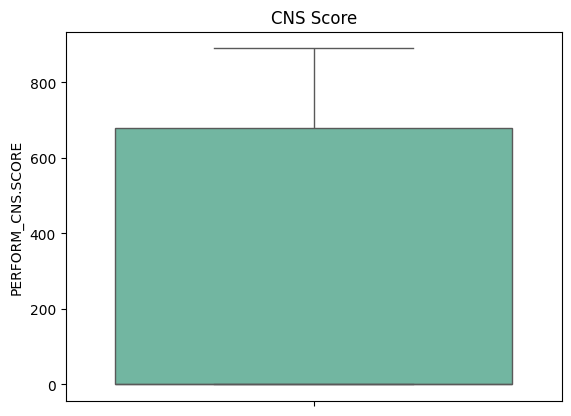

In [50]:
sns.boxplot(train['PERFORM_CNS.SCORE'])
plt.title("CNS Score")
plt.savefig("pictures/boxpl_perform_cns_score.png", bbox_inches="tight")
plt.show()

Primary No of accounts, Secondary No of accounts
- Count of total loans taken by the customer at the time of disbursement
- Primary accounts are those which the customer has taken for his personal use
- Secondary accounts are those which the customer act as a co-applicant or gaurantor

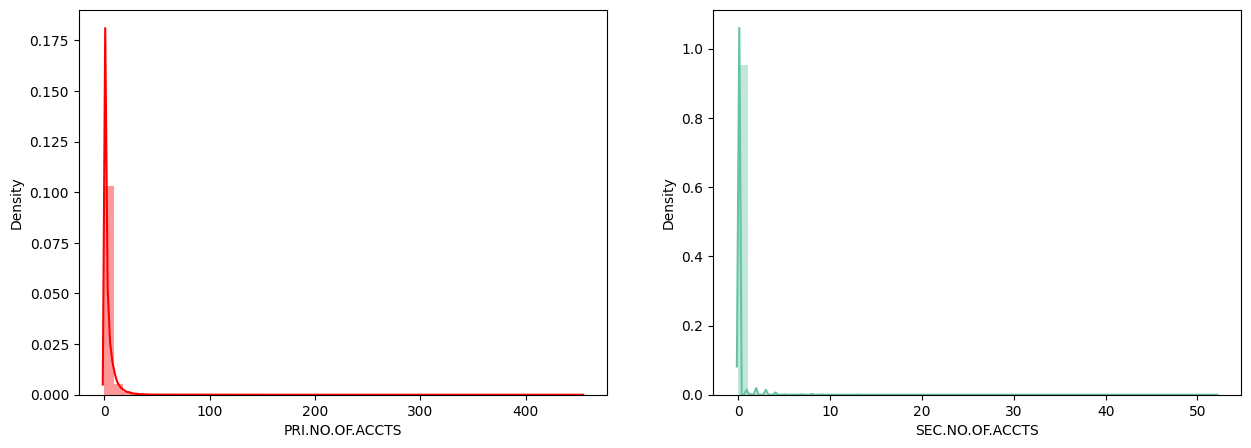

In [51]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train['PRI.NO.OF.ACCTS'],ax=axes[0],color='r')
sns.distplot(train['SEC.NO.OF.ACCTS'],ax=axes[1])
plt.savefig("pictures/prim_second_no_of_acc.png", bbox_inches="tight")
plt.show()

Primary Active accounts,Secondary Active accounts

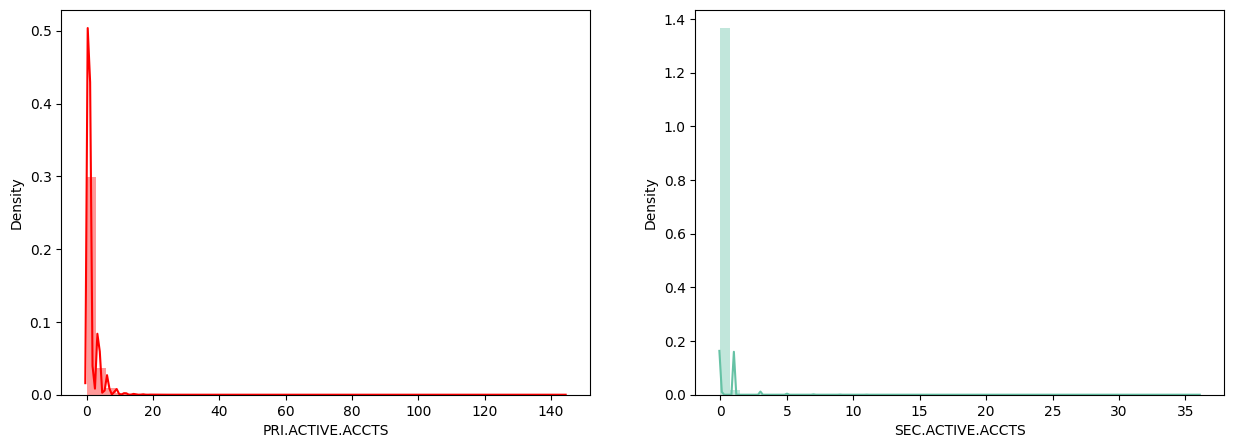

In [52]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train['PRI.ACTIVE.ACCTS'],ax=axes[0],color='r')
sns.distplot(train['SEC.ACTIVE.ACCTS'],ax=axes[1])
plt.savefig("pictures/prim_second_active_acc.png", bbox_inches="tight")
plt.show()

Primary and Secondary Overdue Accounts
- Count of default accounts at the time of disbursement

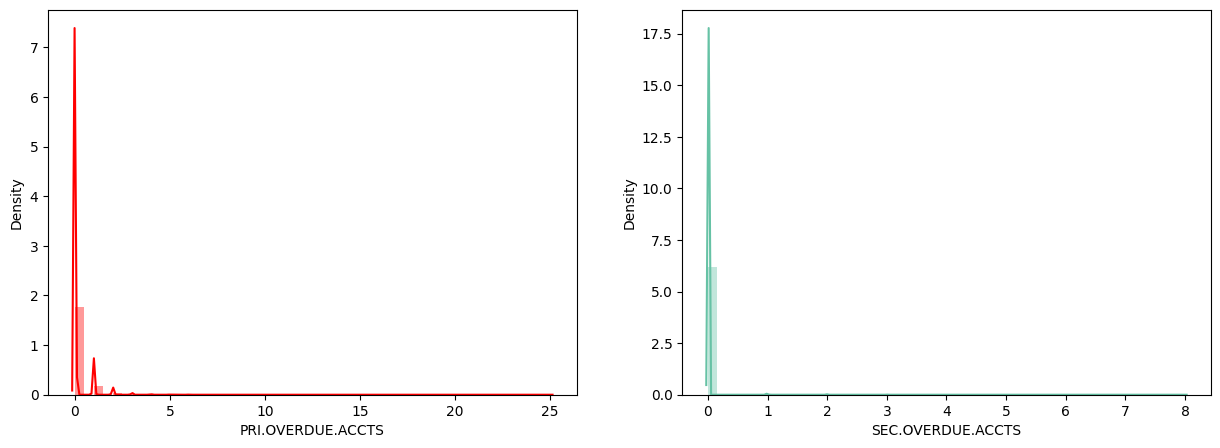

In [53]:
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train['PRI.OVERDUE.ACCTS'],ax=axes[0],color='r')
sns.distplot(train['SEC.OVERDUE.ACCTS'],ax=axes[1])
plt.savefig("pictures/prim_second_overdue_acc.png", bbox_inches="tight")
plt.show()

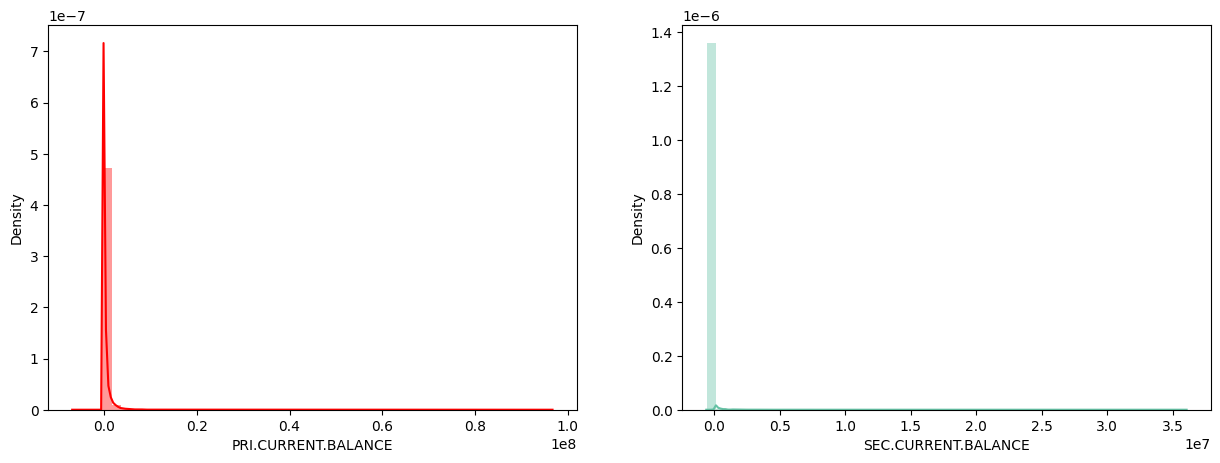

In [54]:
# PRI.CURRENT.BALANCE
fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train['PRI.CURRENT.BALANCE'],ax=axes[0],color='r')
sns.distplot(train['SEC.CURRENT.BALANCE'],ax=axes[1])
plt.show()

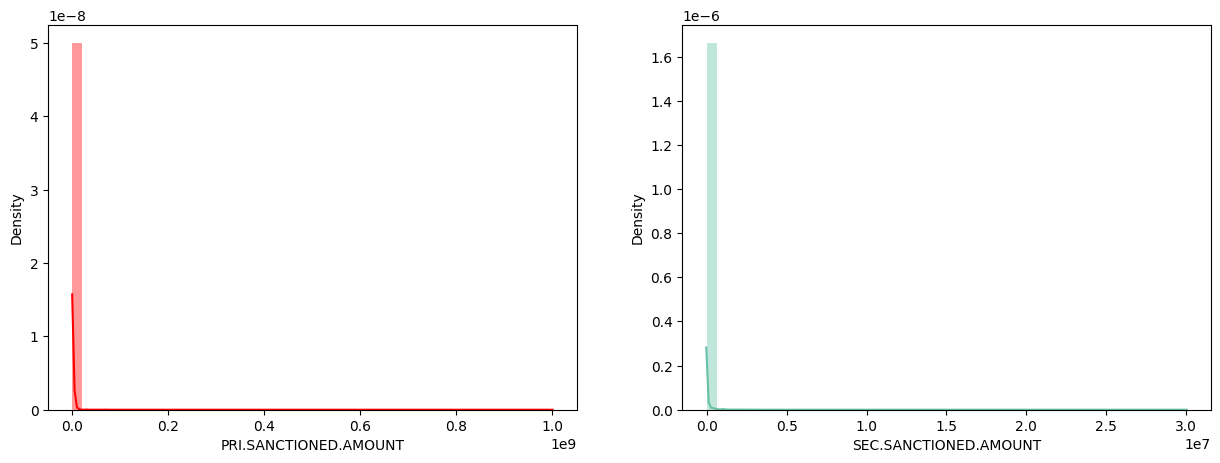

In [55]:
# PRI.SANCTIONED.AMOUNT
# Total amount that was sanctioned for all the loans at the time of disbursement

fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train['PRI.SANCTIONED.AMOUNT'],ax=axes[0],color='r')
sns.distplot(train['SEC.SANCTIONED.AMOUNT'],ax=axes[1])
plt.show()

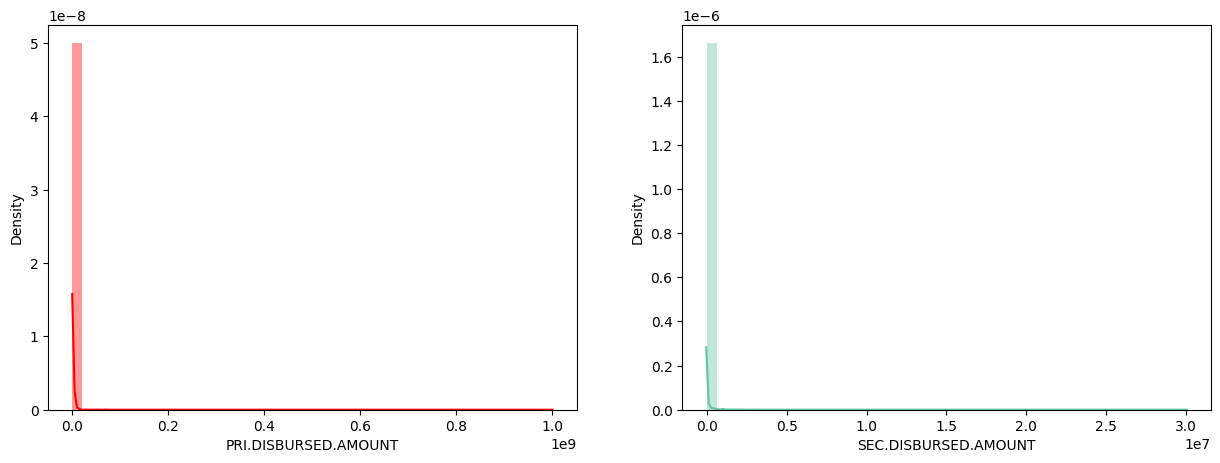

In [56]:
# PRI.DISBURSED.AMOUNT
# Total amount that was disbursed for all the loans at the time of disbursement

fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train['PRI.DISBURSED.AMOUNT'],ax=axes[0],color='r')
sns.distplot(train['SEC.DISBURSED.AMOUNT'],ax=axes[1])
plt.show()

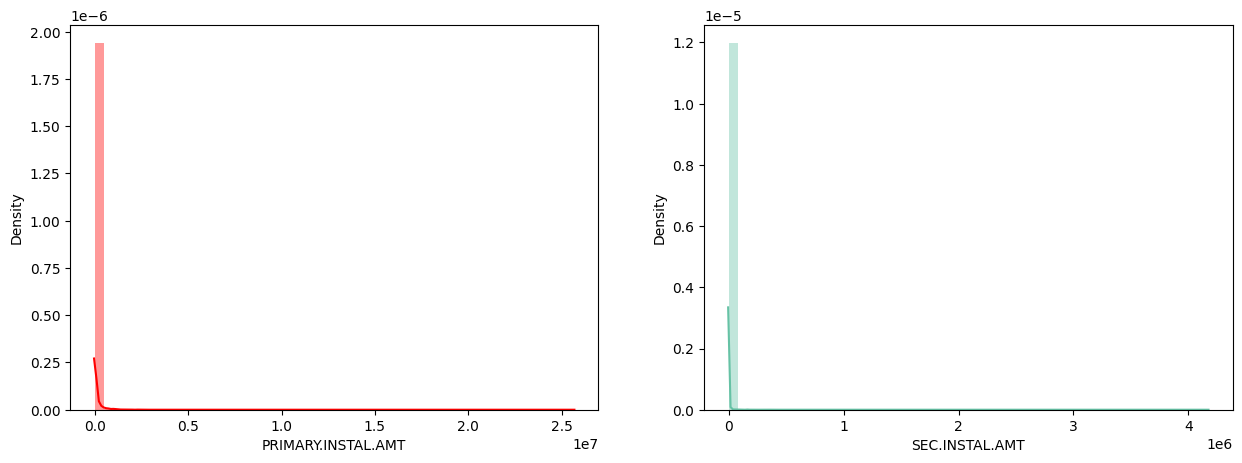

In [57]:
# PRIMARY.INSTAL.AMT = EMI Amount of the primary loan
# SEC.INSTAL.AMT = EMI Amount of the primary loan

fig,axes = plt.subplots(1,2,figsize=(15,5))
sns.distplot(train['PRIMARY.INSTAL.AMT'],ax=axes[0],color='r')
sns.distplot(train['SEC.INSTAL.AMT'],ax=axes[1])
plt.show()

Bivariate Analysis

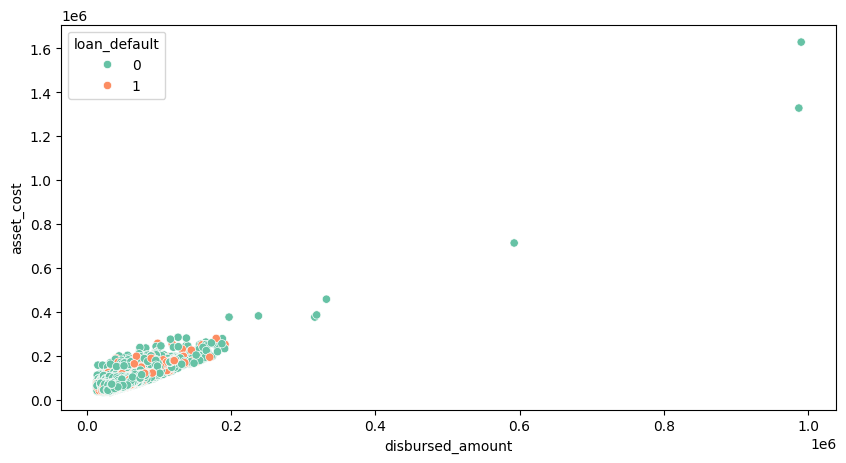

In [58]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=train["disbursed_amount"], y=train["asset_cost"], hue=train['loan_default'])
plt.show()

In [59]:
train[["disbursed_amount","asset_cost"]].corr()

,disbursed_amount,asset_cost
disbursed_amount,1.000000,0.752668
asset_cost,0.752668,1.000000


Strong correlation between disbursed amount and asset cost

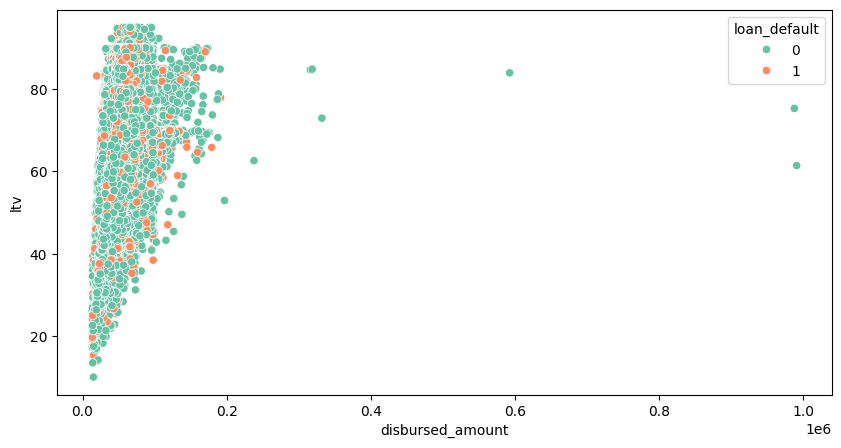

In [60]:
plt.figure(figsize=(10,5))
sns.scatterplot(x=train["disbursed_amount"], y=train["ltv"], hue=train['loan_default'],markers="x")
plt.show()

In [61]:
train[["disbursed_amount","ltv"]].corr()

,disbursed_amount,ltv
disbursed_amount,1.000000,0.376747
ltv,0.376747,1.000000


Moderate correlation between disbursed amount and asset cost

Employment Type Vs Loan Default

In [62]:
a = pd.crosstab(train['Employment.Type'], train['loan_default'], normalize="index")
a

loan_default,0,1
Employment.Type,,
Missing,0.785407,0.214593
Salaried,0.796542,0.203458
Self employed,0.772343,0.227657


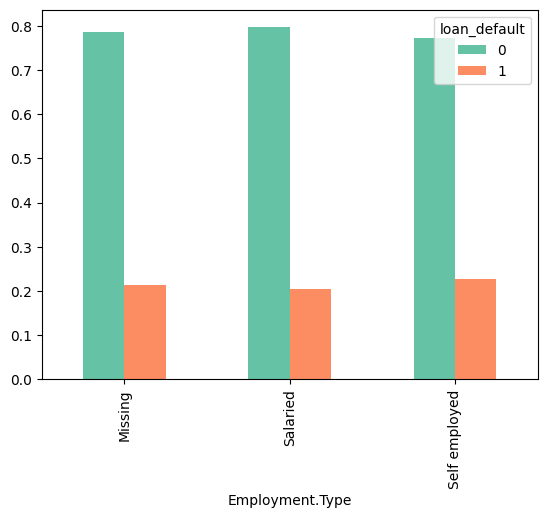

In [63]:
a.plot(kind='bar')
plt.show()

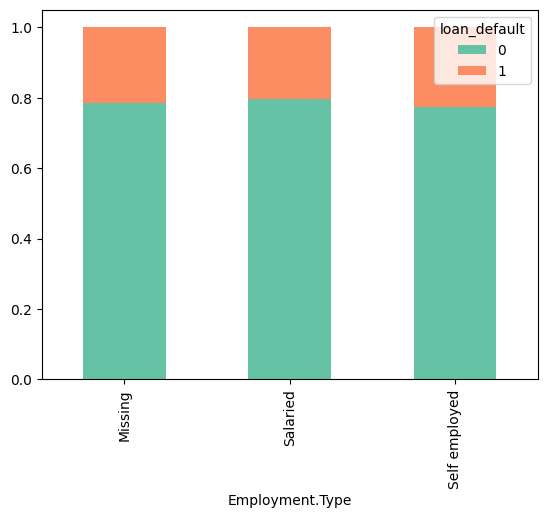

In [64]:
a.plot(kind = 'bar', stacked = True)
plt.show()

In [65]:
b = pd.crosstab(train['PERFORM_CNS.SCORE.DESCRIPTION'], train['loan_default'])
b

loan_default,0,1
PERFORM_CNS.SCORE.DESCRIPTION,,
Low,57638,11384
Medium,9239,3173
High,8777,3248
Very High,6919,2991
Not Scored,99970,29815


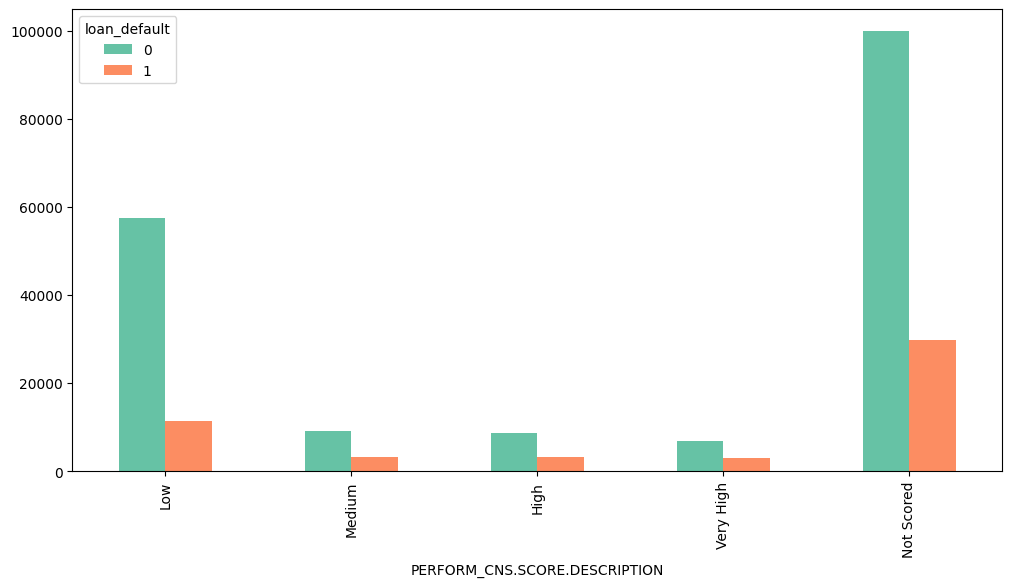

In [66]:
b.plot.bar(figsize=(12,6))
plt.show()

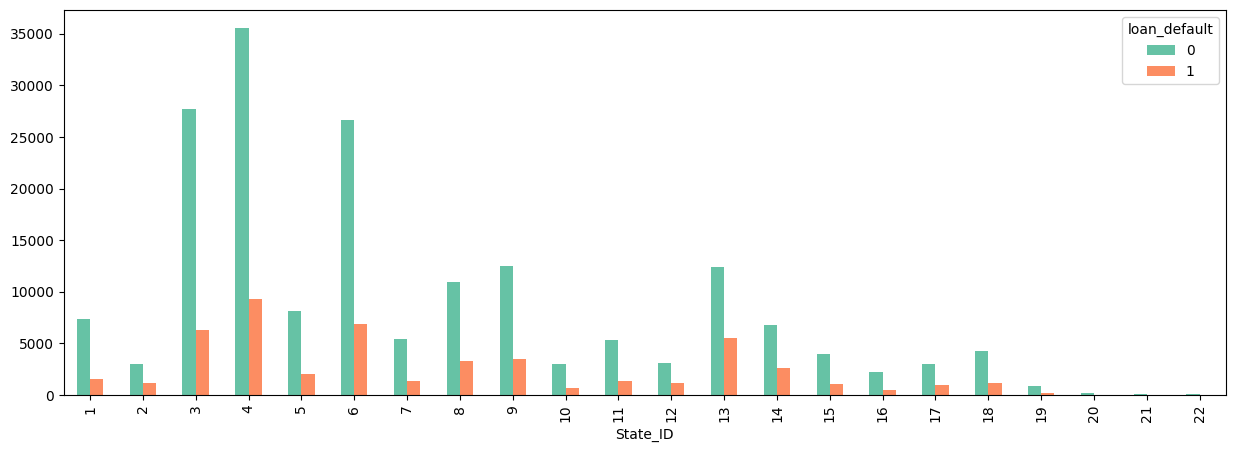

In [67]:
pd.crosstab(train['State_ID'], train['loan_default']).plot.bar(figsize=(15,5))
plt.show()

Multivariate Analysis

In [68]:
train.select_dtypes(include=['int64','float64']).columns

Index(['disbursed_amount', 'asset_cost', 'ltv', 'supplier_id',
       'PERFORM_CNS.SCORE', 'PRI.NO.OF.ACCTS', 'PRI.ACTIVE.ACCTS',
       'PRI.OVERDUE.ACCTS', 'PRI.CURRENT.BALANCE', 'PRI.SANCTIONED.AMOUNT',
       'PRI.DISBURSED.AMOUNT', 'SEC.NO.OF.ACCTS', 'SEC.ACTIVE.ACCTS',
       'SEC.OVERDUE.ACCTS', 'SEC.CURRENT.BALANCE', 'SEC.SANCTIONED.AMOUNT',
       'SEC.DISBURSED.AMOUNT', 'PRIMARY.INSTAL.AMT', 'SEC.INSTAL.AMT',
       'NEW.ACCTS.IN.LAST.SIX.MONTHS', 'DELINQUENT.ACCTS.IN.LAST.SIX.MONTHS',
       'AVERAGE.ACCT.AGE', 'CREDIT.HISTORY.LENGTH', 'NO.OF_INQUIRIES', 'age',
       'AgeatDisbursal'],
      dtype='object')

In [69]:
train[["disbursed_amount","asset_cost"]].corr()

,disbursed_amount,asset_cost
disbursed_amount,1.000000,0.752668
asset_cost,0.752668,1.000000


Disbursed amount and asset cost seems to be positively correlated.